# Funnel Data Processing

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

from fatiando import utils
from matplotlib import colors, ticker, cm
from IPython.display import Image as img

# Importing the background

In [36]:
bname = 'background/Data_20190301_172148_background.dat'

In [37]:
back1 = pd.read_csv(bname, skiprows=2, delim_whitespace=True, usecols=(3, 9, 10, 11), header=None, names=['V', 'Sx', 'Sy', 'Sz'], nrows=1022)

back2 = pd.read_csv(bname, skiprows=1024, delim_whitespace=True, usecols=(3, 5, 6, 7), header=None, names=['V', 'Sx', 'Sy', 'Sz'])

back = pd.concat([back1, back2])

volt = back['V'].get_values()
train_dist = (volt - volt[0])*129.6/(volt[0] - volt[-1])
print train_dist

sy_dist = train_dist
sz_dist = train_dist - 1.5
sx_dist = train_dist - 3.

maskz = (sz_dist <= 0.) & (sz_dist >= -133.6)

dz = {'Sz': back['Sz'].get_values(), 'Sz_dist': sz_dist}
dz = pd.DataFrame(data=dz)
dz = dz[maskz].reset_index().drop(labels='index', axis=1)

masky = (sy_dist >= -133.6)

dy = {'Sy': back['Sy'].get_values(), 'Sy_dist': sy_dist}
dy = pd.DataFrame(data=dy)
dy = dy[masky].reset_index().drop(labels='index', axis=1)

maskx = (sx_dist <= 0.) & (sx_dist >= -133.6)

dx = {'Sx': back['Sx'][:], 'Sx_dist': sx_dist}
dx = pd.DataFrame(data=dx)
dx = dx[maskx].reset_index().drop(labels='index', axis=1)

size = np.array([sx_dist[maskx].size, sy_dist[masky].size, sz_dist[maskz].size])

lim = np.min(size)
print lim

df = {'Sx': dx['Sx'][:lim], 'Sy': dy['Sy'][:lim], 'Sz': dz['Sz'][:lim]}
df = pd.DataFrame(data=df)

dw = {'Line': np.ones(lim, dtype=np.int8) + 0}
back_dfw = pd.DataFrame(data=dw)
back_dfw
back_dfw.loc[:, 'X'] = 0.
back_dfw.loc[:, 'Y'] = dx['Sx_dist']
back_dfw.loc[:, 'Bx'] = (df['Sy'] - df['Sx'])/np.sqrt(2.)
back_dfw.loc[:, 'By'] = - df['Sz']
back_dfw.loc[:, 'Bz'] = (df['Sy'] + df['Sx'])/np.sqrt(2.)
back_dfw.loc[:, 'Bm'] = np.sqrt(back_dfw['Bx']**2. + back_dfw['By']**2. + back_dfw['Bz']**2.)

[  0.00000000e+00  -1.16896295e-02   0.00000000e+00 ...,  -1.29605845e+02
  -1.29597078e+02  -1.29600000e+02]
3520


### Reading train data files

In [38]:
existing_file = glob.glob("*.csv")
existing_file

['funnel_data.csv']

In [39]:
if existing_file != []:
    os.remove(existing_file[0])   

In [40]:
fnames = sorted(glob.glob('*.dat'))
fnames

['Data_20190301_100_002.dat',
 'Data_20190301_101_004.dat',
 'Data_20190301_102_006.dat',
 'Data_20190301_103_008.dat',
 'Data_20190301_104_010.dat',
 'Data_20190301_104_012.dat',
 'Data_20190301_105_014.dat',
 'Data_20190301_106_016.dat',
 'Data_20190301_107_018.dat',
 'Data_20190301_108_020.dat',
 'Data_20190301_109_022.dat',
 'Data_20190301_110_024.dat',
 'Data_20190301_111_026.dat',
 'Data_20190301_112_028.dat',
 'Data_20190301_113_030.dat',
 'Data_20190301_114_032.dat',
 'Data_20190301_115_034.dat',
 'Data_20190301_116_036.dat',
 'Data_20190301_117_038.dat',
 'Data_20190301_118_040.dat']

In [41]:
for n, name in enumerate(fnames):

    print n, name
    data1 = pd.read_csv(name, skiprows=2, delim_whitespace=True, usecols=(3, 9, 10, 11), header=None, names=['V', 'Sx', 'Sy', 'Sz'], nrows=1022)

    data2 = pd.read_csv(name, skiprows=1024, delim_whitespace=True, usecols=(3, 5, 6, 7), header=None, names=['V', 'Sx', 'Sy', 'Sz'])

    data = pd.concat([data1, data2])

    volt = data['V'].get_values()
    train_dist = (volt - volt[0])*129.6/(volt[0] - volt[-1])
    print train_dist

    sy_dist = train_dist
    sz_dist = train_dist - 1.5
    sx_dist = train_dist - 3.

    maskz = (sz_dist <= 0.) & (sz_dist >= -133.6)

    dz = {'Sz': data['Sz'].get_values(), 'Sz_dist': sz_dist}
    dz = pd.DataFrame(data=dz)
    dz = dz[maskz].reset_index().drop(labels='index', axis=1)

    masky = (sy_dist >= -133.6)

    dy = {'Sy': data['Sy'].get_values(), 'Sy_dist': sy_dist}
    dy = pd.DataFrame(data=dy)
    dy = dy[masky].reset_index().drop(labels='index', axis=1)

    maskx = (sx_dist <= 0.) & (sx_dist >= -133.6)

    dx = {'Sx': data['Sx'][:], 'Sx_dist': sx_dist}
    dx = pd.DataFrame(data=dx)
    dx = dx[maskx].reset_index().drop(labels='index', axis=1)

    size = np.array([sx_dist[maskx].size, sy_dist[masky].size, sz_dist[maskz].size])

    lim = np.min(size)
    print lim

    df = {'Sx': dx['Sx'][:lim], 'Sy': dy['Sy'][:lim], 'Sz': dz['Sz'][:lim]}
    df = pd.DataFrame(data=df)

    dw = {'Line': np.ones(lim, dtype=np.int8) + n}
    dfw = pd.DataFrame(data=dw)
    dfw
    dfw.loc[:, 'X'] = n*2.
    dfw.loc[:, 'Y'] = dx['Sx_dist']
    dfw.loc[:, 'Bx'] = (df['Sy'] - df['Sx'])/np.sqrt(2.)
    dfw.loc[:, 'By'] = - df['Sz']
    dfw.loc[:, 'Bz'] = (df['Sy'] + df['Sx'])/np.sqrt(2.)
    dfw.loc[:, 'Bm'] = np.sqrt(dfw['Bx']**2. + dfw['By']**2. + dfw['Bz']**2.)
    dfw.loc[:, 'Bm_res'] = dfw['Bm'] - back_dfw['Bm']

    if n == 0:
        header = True
    else:
        header = False
    dfw.to_csv('funnel_data.csv', index=None, sep=',', mode='a', header=header)

0 Data_20190301_100_002.dat
[  0.00000000e+00  -2.95033113e-02  -5.09602649e-02 ...,  -1.29591954e+02
  -1.29591954e+02  -1.29600000e+02]
3520
1 Data_20190301_101_004.dat
[  0.00000000e+00   5.48780488e-03   8.23170732e-03 ...,  -1.29602744e+02
  -1.29597256e+02  -1.29600000e+02]
3520
2 Data_20190301_102_006.dat
[  0.00000000e+00  -2.18997529e-02  -3.83245675e-02 ...,  -1.29597263e+02
  -1.29608212e+02  -1.29600000e+02]
3520
3 Data_20190301_103_008.dat
[  0.00000000e+00  -2.07942238e-02  -2.59927798e-03 ...,  -1.29592202e+02
  -1.29597401e+02  -1.29600000e+02]
3520
4 Data_20190301_104_010.dat
[  0.00000000e+00   1.70597398e-02   2.84328997e-02 ...,  -1.29571567e+02
  -1.29582940e+02  -1.29600000e+02]
3520
5 Data_20190301_104_012.dat
[  0.00000000e+00  -5.50003183e-03  -1.37500796e-02 ...,  -1.29613750e+02
  -1.29613750e+02  -1.29600000e+02]
3500
6 Data_20190301_105_014.dat
[  0.00000000e+00  -3.38845676e-02  -3.95319956e-02 ...,  -1.29619766e+02
  -1.29625413e+02  -1.29600000e+02]
3500

In [42]:
dobs = pd.read_csv('funnel_data.csv')

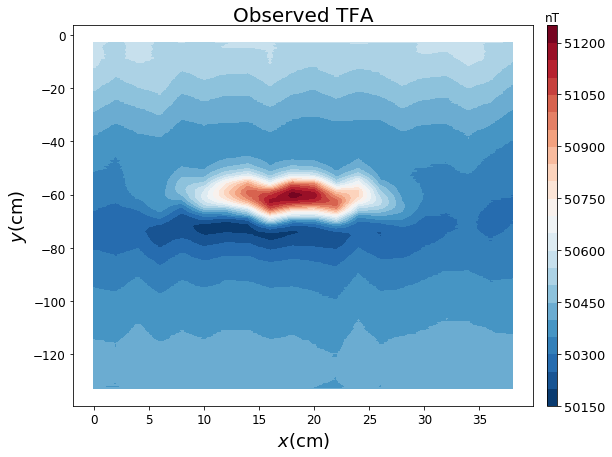

In [43]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(dobs['X'], dobs['Y'], dobs['Bm'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$x$(cm)', fontsize=18)
plt.ylabel('$y$(cm)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300)
plt.show()

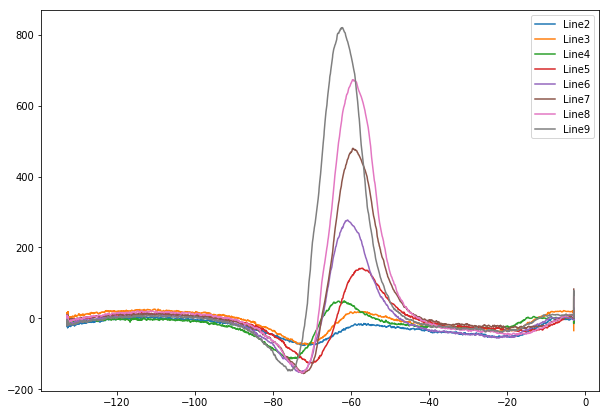

In [44]:
line = []
plt.figure(figsize=(10,7))
for i in range(2, 10, 1):
    mask = (dobs['Line'] == i)
    plt.plot(dobs[mask]['Y'], dobs[mask]['Bm_res'])
    line.append('Line'+str(i))
plt.legend(line)
plt.show()

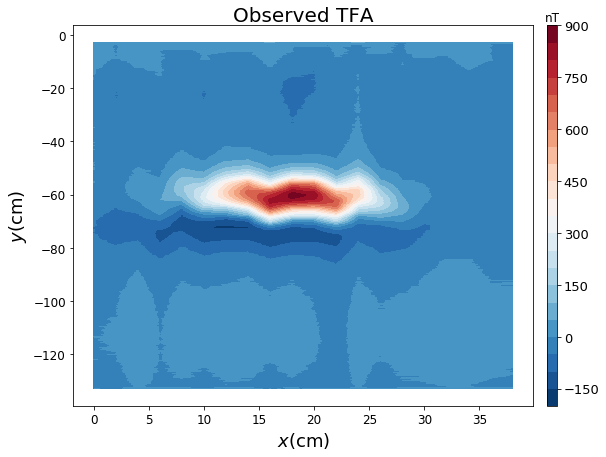

In [45]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(dobs['X'], dobs['Y'], dobs['Bm_res'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$x$(cm)', fontsize=18)
plt.ylabel('$y$(cm)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300)
plt.show()